# Agrupamento Base de Dados IES

## Importação das Bibliotecas

In [1]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.simplefilter('ignore')

----------------------------------------

## Importação do Dataset:

In [2]:
df = pd.read_csv('../../data/dataset_new_with_outliers.csv')
df

,Codigo da IES,Natureza,Situacao,DIAS,%,CI N,CI V,IGC_N,IGC_M,IGC_V,EAD_17,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,21685,1,1,161,0.400000,2,3,1.541367,1.570313,1.641055,0,0.000000,0,0.000000,3,0.00,0.000000
1,17289,1,1,1328,0.800000,3,3,2.702910,2.621254,2.589799,1,-0.333333,51,0.078431,1,243114.29,0.205394
2,977,0,1,248,0.153846,2,3,1.421430,1.472093,1.541100,0,0.000000,0,0.000000,0,0.00,0.000000
3,913,0,1,8796,0.466667,3,3,2.367000,2.305285,2.326510,1,-0.054737,475,0.000000,3,51862.06,0.000000
4,21399,1,1,460,0.176471,2,3,1.330864,1.369776,1.449247,0,0.000000,0,0.000000,0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,2362,1,0,5204,0.894737,5,3,2.410600,2.410600,2.800800,1,-0.145072,2516,0.387917,8,67946547.63,0.666314
2173,3596,1,0,823,0.800000,3,3,2.621100,2.621100,3.043900,0,0.000000,0,0.000000,0,0.00,0.000000
2174,1289,0,0,860,1.000000,4,4,2.438600,2.438600,2.438600,1,-0.004474,447,0.015660,1,25162.00,0.000000
2175,4008,0,0,1005,0.333333,3,3,1.693800,1.693800,1.693800,0,0.000000,0,0.000000,0,0.00,0.000000


-------------------------------

## Formatação do Dataset:

* Removendo colunas desnecessárias:

In [3]:
df = df.drop(columns={'Codigo da IES', 'CI N', 'CI V', 'Natureza', 'EAD_17'})
df

,Situacao,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,1,161,0.400000,1.541367,1.570313,1.641055,0.000000,0,0.000000,3,0.00,0.000000
1,1,1328,0.800000,2.702910,2.621254,2.589799,-0.333333,51,0.078431,1,243114.29,0.205394
2,1,248,0.153846,1.421430,1.472093,1.541100,0.000000,0,0.000000,0,0.00,0.000000
3,1,8796,0.466667,2.367000,2.305285,2.326510,-0.054737,475,0.000000,3,51862.06,0.000000
4,1,460,0.176471,1.330864,1.369776,1.449247,0.000000,0,0.000000,0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2172,0,5204,0.894737,2.410600,2.410600,2.800800,-0.145072,2516,0.387917,8,67946547.63,0.666314
2173,0,823,0.800000,2.621100,2.621100,3.043900,0.000000,0,0.000000,0,0.00,0.000000
2174,0,860,1.000000,2.438600,2.438600,2.438600,-0.004474,447,0.015660,1,25162.00,0.000000
2175,0,1005,0.333333,1.693800,1.693800,1.693800,0.000000,0,0.000000,0,0.00,0.000000


* Aplicando normalização:

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [5]:
df[['DIAS', 'IGC_N', 'IGC_M', 
    'IGC_V', 'variacao mat', 'mat_T 2017', '% FIES',
    'CURSOS', 'saldo 2017', 'Variacao 17-16']] = scaler.fit_transform(df[['DIAS', 'IGC_N', 'IGC_M', 
                                                                          'IGC_V', 'variacao mat', 'mat_T 2017', '% FIES',
                                                                          'CURSOS', 'saldo 2017', 'Variacao 17-16']])
df

,Situacao,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16
0,1,0.004825,0.400000,0.304789,0.313594,0.998899,0.003016,0.000000,0.000000,0.001603,0.830934,0.030305
1,1,0.044756,0.800000,0.538268,0.523926,0.999210,0.001966,0.000137,0.079080,0.000534,0.830944,0.030305
2,1,0.007802,0.153846,0.280680,0.293936,0.998866,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305
3,1,0.300291,0.466667,0.470747,0.460688,0.999123,0.002844,0.001272,0.000000,0.001603,0.830936,0.030305
4,1,0.015056,0.176471,0.262476,0.273459,0.998836,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305
...,...,...,...,...,...,...,...,...,...,...,...,...
2172,0,0.177382,0.894737,0.479511,0.481766,0.999279,0.002559,0.006740,0.391123,0.004274,0.833808,0.030305
2173,0,0.027476,0.800000,0.521823,0.523895,0.999359,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305
2174,0,0.028743,1.000000,0.485139,0.487370,0.999160,0.003002,0.001197,0.015789,0.000534,0.830935,0.030305
2175,0,0.033704,0.333333,0.335429,0.338308,0.998916,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305


* Aplicando método PCA:

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns={'Situacao'}))

----------------------

## Agrupamento:

* K-means:

In [182]:
silhouette_kmeans = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_pca)
    silhouette_kmeans.append(metrics.silhouette_score(df_pca, kmeans.labels_, metric='euclidean'))

graph = px.line(x = range(2, 21), y = silhouette_kmeans, labels={
                     "x": "Número de Clusters",
                     "y": "Coeficiente de Sulhueta"
                 },
                title="Avaliação do Número de Clusters KMeans")
graph.write_image('./graphs/m_clusters_kmeans.png')
graph.show()

In [183]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(df_pca)

graph = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=labels_kmeans, labels={
                     "x": "Eixo X",
                     "y": "Eixo Y",
                     "color": "Cluster"
                 },
                title="Rótulos Gerados Por KMeans")
graph.write_image('./graphs/clusters_kmeans.png')
graph.show()

In [184]:
graph = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=df['Situacao'], labels={
                     "x": "Eixo X",
                     "y": "Eixo Y",
                     "color": "Situação"
                 },
                title="Rótulos Verdadeiros (Situação da IES)")
graph.write_image('./graphs/labels_kmeans.png')
graph.show()

* Hierarchical:

In [185]:
silhouette_hc = []

for i in range(2, 21):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit(df_pca)
    silhouette_hc.append(metrics.silhouette_score(df_pca, hc.labels_, metric='euclidean'))

graph = px.line(x = range(2, 21), y = silhouette_hc, labels={
                     "x": "Número de Clusters",
                     "y": "Coeficiente de Sulhueta"
                 },
                title="Avaliação do Número de Clusters HC")
graph.write_image('./graphs/m_clusters_hc.png')
graph.show()

In [186]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_hc = hc.fit_predict(df_pca)

graph = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=labels_hc, labels={
                     "x": "Eixo X",
                     "y": "Eixo Y",
                     "color": "Cluster"
                 },
                title="Rótulos Gerados Por Hierarchical Cluster")
graph.write_image('./graphs/clusters_hc.png')
graph.show()

In [187]:
graph = px.scatter(x = df_pca[:,0], y = df_pca[:,1], color=df['Situacao'], labels={
                     "x": "Eixo X",
                     "y": "Eixo Y",
                     "color": "Situação"
                 },
                title="Rótulos Verdadeiros (Situação da IES)")
graph.write_image('./graphs/labels_hc.png')
graph.show()

-----------------

## Avaliação dos Resultados:

* Índice rand:

In [121]:
print('Rand Score Kmeans: ', metrics.rand_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Rand Score Hierarchical: ', metrics.rand_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Rand Score DBSCAN: ', metrics.rand_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Rand Score Kmeans:  0.5644809370693615
Rand Score Hierarchical:  0.5318148963765571
Rand Score DBSCAN:  0.7261105406792943


* Índice rand ajustado:

In [122]:
print('Rand Score Ajusted Kmeans: ', metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Rand Score Ajusted Hierarchical: ', metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Rand Score Ajusted DBSCAN: ', metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Rand Score Ajusted Kmeans:  0.09565917894910804
Rand Score Ajusted Hierarchical:  0.053525248858974174
Rand Score Ajusted DBSCAN:  0.11597494841602377


* Informação mútua:

In [91]:
print('Informação Mútua Kmeans: ', metrics.adjusted_mutual_info_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Informação Mútua Hierarchical: ', metrics.adjusted_mutual_info_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Informação Mútua DBSCAN: ', metrics.adjusted_mutual_info_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Informação Mútua Kmeans:  0.07021250198601654
Informação Mútua Hierarchical:  0.05388558623677179
Informação Mútua DBSCAN:  0.09397547309107167


* Homogeneidade:

In [123]:
print('Homogeneidade Kmeans: ', metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Homogeneidade Hierarchical: ', metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Homogeneidade DBSCAN: ', metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Homogeneidade Kmeans:  0.10121512603284928
Homogeneidade Hierarchical:  0.07951860896449467
Homogeneidade DBSCAN:  0.1704800040556168


* Completude:

In [124]:
print('Completude Kmeans: ', metrics.completeness_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Completude Hierarchical: ', metrics.completeness_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Completude DBSCAN: ', metrics.completeness_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Completude Kmeans:  0.054244170152654446
Completude Hierarchical:  0.04123133319472944
Completude DBSCAN:  0.08893277746468939


* V_score:

In [125]:
print('Medida V Kmeans: ', metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Medida V Hierarchical: ', metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Medida V DBSCAN: ', metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Medida V Kmeans:  0.07063367264955113
Medida V Hierarchical:  0.0543049247522314
Medida V DBSCAN:  0.1168890767371131


* Pontuação de Fowlkes-Mallows:

In [95]:
print('Fowlkes-Mallows Kmeans: ', metrics.fowlkes_mallows_score(labels_true=df['Situacao'], labels_pred=labels_kmeans))
print('Fowlkes-Mallows Hierarchical: ', metrics.fowlkes_mallows_score(labels_true=df['Situacao'], labels_pred=labels_hc))
print('Fowlkes-Mallows DBSCAN: ', metrics.fowlkes_mallows_score(labels_true=df['Situacao'], labels_pred=labels_dbscan))

Fowlkes-Mallows Kmeans:  0.6862836411344969
Fowlkes-Mallows Hierarchical:  0.6580789732066252
Fowlkes-Mallows DBSCAN:  0.8306985677765786


---------------------------

## Gráficos:

* Criando listas de resultados:

In [188]:
kmeans_ari = []
kmeans_hg = []
kmeans_cp = []
kmeans_v = []

hc_ari = []
hc_hg = []
hc_cp = []
hc_v = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_pca)
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit(df_pca)

    kmeans_ari.append(metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=kmeans.labels_))
    kmeans_hg.append(metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=kmeans.labels_))
    kmeans_cp.append(metrics.completeness_score(labels_true=df['Situacao'], labels_pred=kmeans.labels_))
    kmeans_v.append(metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=kmeans.labels_))

    hc_ari.append(metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=hc.labels_))
    hc_hg.append(metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=hc.labels_))
    hc_cp.append(metrics.completeness_score(labels_true=df['Situacao'], labels_pred=hc.labels_))
    hc_v.append(metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=hc.labels_))

df_kmeans = pd.DataFrame({'Homogeneity': kmeans_hg, 'Ajusted Rand Score': kmeans_ari, 'Completeness': kmeans_cp, 'V_Score': kmeans_v})
df_hc = pd.DataFrame({'Homogeneity': hc_hg, 'Ajusted Rand Score': hc_ari, 'Completeness': hc_cp, 'V_Score': hc_v})

* Comparando métricas de desempenho KMeans:

In [189]:
graph = px.line(df_kmeans, x=range(2,21), y=['Homogeneity', 'Ajusted Rand Score', 'Completeness', 'V_Score'], markers=True, labels={
                     "x": "Número de Clusters",
                     "value": "Pontuação"
                 },
                title="Avaliação das Metrícas em KMeans")
graph.write_image('./graphs/metricas_kmeans.png')
graph.show()

* Comparando métricas de desempenho Hierarchical:

In [190]:
graph = px.line(df_hc, x=range(2,21), y=['Homogeneity', 'Ajusted Rand Score', 'Completeness', 'V_Score'], markers=True, labels={
                     "x": "Número de Clusters",
                     "y": "Pontuação"
                 },
                title="Avaliação das Metrícas em HC")
graph.write_image('./graphs/metricas_hc.png')
graph.show()

* Comparando modelos de agrupamento:

In [191]:
label = ['KMeans', 'Hierarchical']
ari = [metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=labels_kmeans), metrics.adjusted_rand_score(labels_true=df['Situacao'], labels_pred=labels_hc)]
hg = [metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=labels_kmeans), metrics.homogeneity_score(labels_true=df['Situacao'], labels_pred=labels_hc)]
cp = [metrics.completeness_score(labels_true=df['Situacao'], labels_pred=labels_kmeans), metrics.completeness_score(labels_true=df['Situacao'], labels_pred=labels_hc)]
v = [metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=labels_kmeans), metrics.v_measure_score(labels_true=df['Situacao'], labels_pred=labels_hc)]

df_models = pd.DataFrame({'Label': label, 'Ajusted Rand Score': ari, 'Homogeneity': hg, 'Completeness': cp, 'V_score': v})

graph = px.bar(df_models, x='Label', y=['Ajusted Rand Score', 'Homogeneity', 'Completeness', 'V_score'], labels={
    "Label": "Modelo",
    "value": "Pontuação"
}, title='Comparando Modelos de Agrupamento')
graph.write_image('./graphs/comparing_models.png')
graph.show()

-------------------------------

## Resultados do Melhor Modelo:

* Construindo datasets de análises:

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels_kmeans = kmeans.fit_predict(df_pca)

df['Cluster'] = labels_kmeans

df_0 = df.loc[df['Cluster'] == 0]
df_1 = df.loc[df['Cluster'] == 1]

In [8]:
df_0 = df_0.describe()
df_0

,Situacao,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16,Cluster
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.0
mean,0.774786,0.152251,0.230548,0.325911,0.331782,0.998902,0.004657,0.000381,0.021976,0.001932,0.831658,0.030305,0.0
std,0.417979,0.140077,0.164853,0.107166,0.103182,0.000207,0.035432,0.001483,0.068735,0.027208,0.006763,0.000002,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.996959,0.000304,0.000000,0.000000,0.000000,0.822841,0.030295,0.0
25%,1.000000,0.028469,0.076923,0.253538,0.270430,0.998818,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305,0.0
50%,1.000000,0.152712,0.250000,0.305318,0.319261,0.998902,0.003016,0.000000,0.000000,0.000000,0.830934,0.030305,0.0
75%,1.000000,0.215740,0.357143,0.417601,0.411748,0.999041,0.003016,0.000271,0.000000,0.001068,0.830938,0.030305,0.0
max,1.000000,1.000000,0.625000,0.972393,1.000000,1.000000,1.000000,0.034559,0.543783,0.762821,1.000000,0.030361,0.0


In [9]:
df_1 = df_1.describe()
df_1

,Situacao,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16,Cluster
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.0
mean,0.952941,0.076332,0.645778,0.507791,0.505600,0.998310,0.003149,0.007579,0.161421,0.007980,0.834280,0.030974,1.0
std,0.211843,0.092116,0.175428,0.115928,0.112483,0.027203,0.002438,0.037787,0.184644,0.040559,0.025818,0.026321,0.0
min,0.000000,0.000000,0.000000,0.028536,0.150221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.022036,0.527652,0.439276,0.446412,0.999073,0.002797,0.000246,0.000000,0.000534,0.830934,0.030305,1.0
50%,1.000000,0.039008,0.643361,0.497340,0.493796,0.999153,0.003016,0.001430,0.097429,0.002671,0.830988,0.030305,1.0
75%,1.000000,0.093447,0.750000,0.546894,0.544620,0.999230,0.003249,0.005112,0.278996,0.006410,0.831641,0.030305,1.0
max,1.000000,0.891429,1.000000,1.000000,1.000000,1.000000,0.084917,1.000000,1.000000,1.000000,0.965607,1.000000,1.0


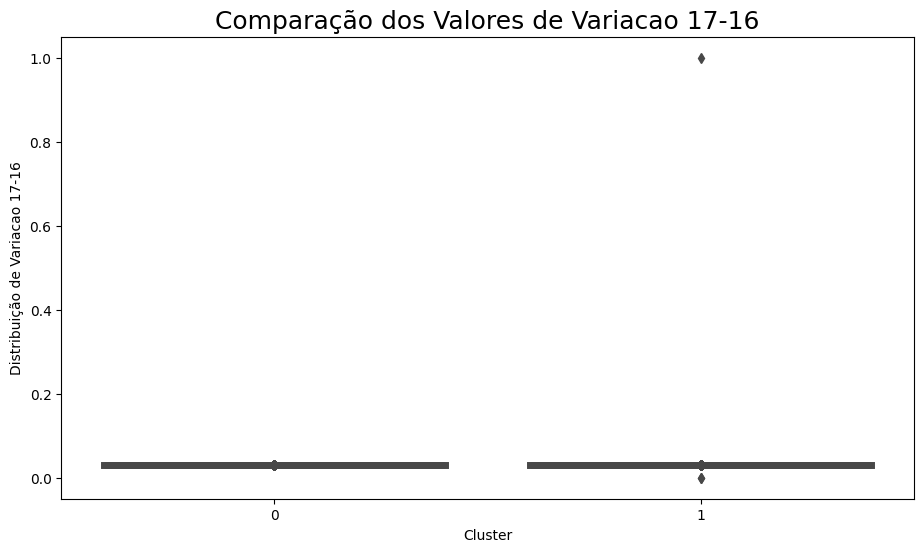

In [23]:
plt.figure(figsize =(11, 6))

colors = ['#6890F0', '#705898', '#98D8D8']

ax = sns.boxplot( x = "Cluster", y ="Variacao 17-16", data = df, linewidth=5, palette=colors)

plt.title("Comparação dos Valores de Variacao 17-16", loc="center", fontsize=18)
plt.xlabel("Cluster")
plt.ylabel("Distribuição de Variacao 17-16")

plt.savefig('./graphs/Variacao 17-16_boxplot_final.png')
plt.show()

In [32]:
df_1.groupby('Situacao').count()

,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16,Cluster
Situacao,,,,,,,,,,,,
0,64,64,64,64,64,64,64,64,64,64,64,64
1,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296


In [33]:
df_0.groupby('Situacao').count()

,DIAS,%,IGC_N,IGC_M,IGC_V,variacao mat,mat_T 2017,% FIES,CURSOS,saldo 2017,Variacao 17-16,Cluster
Situacao,,,,,,,,,,,,
0,184,184,184,184,184,184,184,184,184,184,184,184
1,633,633,633,633,633,633,633,633,633,633,633,633


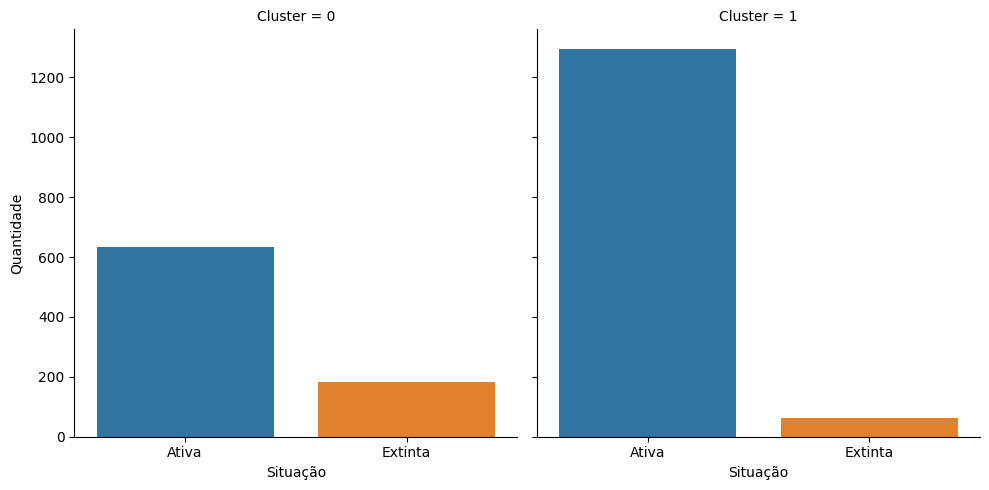

In [47]:
df_bar = pd.DataFrame({ 
    'Situação': ['Ativa', 'Extinta', 'Ativa', 'Extinta'], 
    'Quantidade': [1296, 64, 633, 184], 
    'Cluster': [1, 1, 0, 0] 
}) 

graph = sns.catplot(kind='bar', data=df_bar, x='Situação', y='Quantidade', col='Cluster')
plt.savefig('./graphs/bar_comparing_cluster.png')
plt.show()